# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
pip install ipywidgets

In [ ]:
conda install -c conda-forge ipywidgets

In [2]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Define transforms
#transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])


# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)


# Create test set and define test dataloader
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64)



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?
In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?
I use transformer to change the input to tensor and convert the value from 0 to 255 to 0 to 1 it helps the model converge faster and better

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Image Shape:  torch.Size([64, 1, 28, 28])
Label Shape:  torch.Size([64])


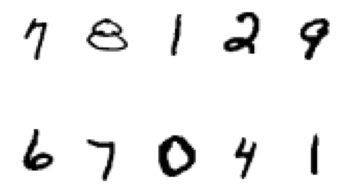

In [4]:
# Explore data
## YOUR CODE HERE ##
dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Image Shape: ', images.shape)
print('Label Shape: ',labels.shape)
"""

The shape of images as you’ll find out is, torch.Size([64,1,28,28]), which suggests that there are 
16 images in each batch and each image has a dimension of 28 x 28 pixels. 
Similarly, the labels have a shape as torch.Size([64]). 16 images should have 16 labels respectively. 


"""
figure = plt.figure()
num_of_images = 10
for index in range(1, (num_of_images + 1)):
    plt.subplot(2, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!


Show5 function:
7


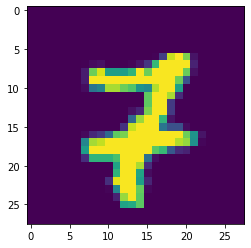

0


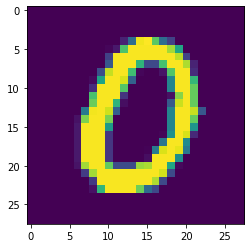

1


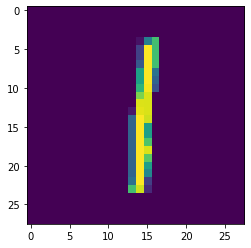

5


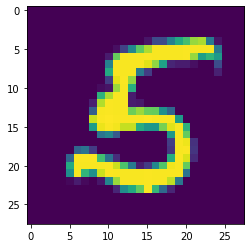

8


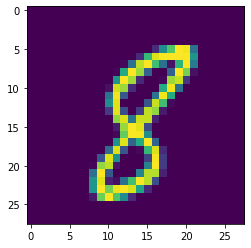

In [5]:
print('\nShow5 function:')
show5(train_loader)

In [7]:
## YOUR CODE HERE ##
# Define the class for your neural network
class MNIST_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 , 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        #x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: ',device)

Device:  cuda


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##
# Instantiate the model
net = MNIST_NN()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
# we can define momentum here too
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Choose a loss function
criterion = nn.CrossEntropyLoss()


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##


num_epochs = 250

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    # put the model in the training mode
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.reshape(-1,28*28)

        # Pass to GPU if available.
        #if torch.cuda.is_available():
        net = net.to(device)
        criterion = criterion.to(device)
        inputs, labels = inputs.to(device), labels.to(device)

        # zero out the gradient of the optimizer
        optimizer.zero_grad()
        

        # giving the input to the model and get back the output from the model
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # Compute the gradeint with loss
        loss.backward()
        # update parameter with each step
        optimizer.step()

        # get the prediction this max and 1 state which class has the highest probabilty so that class is our answer
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

   
#print(MNIST_NN.paramaters)

Epoch 1 training accuracy: 56.29% training loss: 0.39722
Epoch 2 training accuracy: 60.31% training loss: 0.18893
Epoch 3 training accuracy: 61.27% training loss: 0.13885
Epoch 4 training accuracy: 61.81% training loss: 0.11130
Epoch 5 training accuracy: 62.03% training loss: 0.09638
Epoch 6 training accuracy: 62.25% training loss: 0.08399
Epoch 7 training accuracy: 62.46% training loss: 0.07408
Epoch 8 training accuracy: 62.59% training loss: 0.06653
Epoch 9 training accuracy: 62.66% training loss: 0.06218
Epoch 10 training accuracy: 62.82% training loss: 0.05547
Epoch 11 training accuracy: 62.86% training loss: 0.05355
Epoch 12 training accuracy: 62.91% training loss: 0.04851
Epoch 13 training accuracy: 63.03% training loss: 0.04402
Epoch 14 training accuracy: 63.08% training loss: 0.04173
Epoch 15 training accuracy: 63.16% training loss: 0.03853
Epoch 16 training accuracy: 63.20% training loss: 0.03446
Epoch 17 training accuracy: 63.20% training loss: 0.03621
Epoch 18 training accur

KeyboardInterrupt: 

Plot the training loss (and validation loss/accuracy, if recorded).

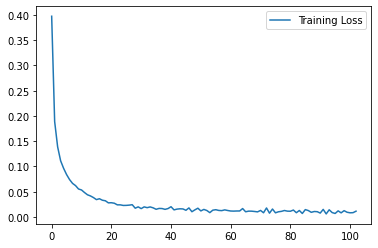

In [11]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
#plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##
val_loss = 0.0
val_correct = 0
total= 0
    # put the network in the eval mode
net.eval()
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.reshape(-1,28*28)

    outputs = net(inputs)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
    total +=1
print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
val_loss_history.append(val_loss/len(test_loader))
 



Epoch 104 validation accuracy: 62.29% validation loss: 0.20775


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [23]:



# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])


# Create training set and define training dataloader
training_data_2 = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader_2 = DataLoader(training_data_2, batch_size=100, shuffle=True)



# Create test set and define test dataloader
test_data_2 = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader_2 = DataLoader(test_data_2, batch_size=100)



class MNIST_NN_Improved(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1=nn.Linear(28*28,200)
        self.fc2=nn.Linear(200,150)
        self.fc3=nn.Linear(150,100)
        self.fc4=nn.Linear(100,80)
        self.fc5=nn.Linear(80,10)

    def forward(self,x):
        x=self.activation(self.fc1(x)) 
        x=self.activation(self.fc2(x))
        x=self.activation(self.fc3(x))
        x=self.activation(self.fc4(x))
        x=self.fc5(x)
        return x
    
class MNIST_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 , 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        #x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

    

In [24]:
## YOUR CODE HERE ##
## YOUR CODE HERE #

# to improve my model I increase the size of batch size
# adding droput to layers
# increase the number of nodes in hidden layer
# add one extra hidden layer


    
## YOUR CODE HERE ##
# Instantiate the model
net_2 = MNIST_NN_Improved()

# Choose an optimizer
optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
#optimizer = optim.SGD(net_2.parameters(), lr=0.003, momentum=0.9)
# we can define momentum here too
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Choose a loss function
criterion_2 = nn.CrossEntropyLoss()

## YOUR CODE HERE ##
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device: ',device)

num_epochs = 250


# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    # put the model in the training mode
    net_2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader_2):
        # data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.reshape(-1,28*28)

        # Pass to GPU if available.
        #if torch.cuda.is_available():
        net_2= net_2.to(device)
        criterion_2 = criterion_2.to(device)
        inputs, labels = inputs.to(device), labels.to(device)

        # zero out the gradient of the optimizer
        optimizer_2.zero_grad()
        

        # giving the input to the model and get back the output from the model
        outputs_2 = net_2(inputs)
        loss_2 = criterion(outputs_2, labels)
        # Compute the gradeint with loss
        loss_2.backward()
        # update parameter with each step
        optimizer_2.step()

        # get the prediction this max and 1 state which class has the highest probabilty so that class is our answer
        _, preds = torch.max(outputs_2.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader_2):.2f}% training loss: {train_loss/len(train_loader_2):.5f}')
    train_loss_history.append(train_loss/len(train_loader_2))


Device:  cuda
Epoch 1 training accuracy: 85.83% training loss: 0.00000
Epoch 2 training accuracy: 94.23% training loss: 0.00000
Epoch 3 training accuracy: 95.56% training loss: 0.00000
Epoch 4 training accuracy: 96.55% training loss: 0.00000
Epoch 5 training accuracy: 97.16% training loss: 0.00000
Epoch 6 training accuracy: 97.25% training loss: 0.00000
Epoch 7 training accuracy: 97.68% training loss: 0.00000
Epoch 8 training accuracy: 97.80% training loss: 0.00000
Epoch 9 training accuracy: 98.15% training loss: 0.00000
Epoch 10 training accuracy: 98.29% training loss: 0.00000
Epoch 11 training accuracy: 98.35% training loss: 0.00000
Epoch 12 training accuracy: 98.50% training loss: 0.00000
Epoch 13 training accuracy: 98.55% training loss: 0.00000
Epoch 14 training accuracy: 98.62% training loss: 0.00000
Epoch 15 training accuracy: 98.78% training loss: 0.00000
Epoch 16 training accuracy: 98.78% training loss: 0.00000
Epoch 17 training accuracy: 99.01% training loss: 0.00000
Epoch 18 

KeyboardInterrupt: 

In [28]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##
val_loss = 0.0
val_correct = 0
total= 0
    # put the network in the eval mode
net_2.eval()
for inputs, labels in test_loader_2:
    inputs, labels = inputs.to(device), labels.to(device)
    inputs = inputs.reshape(-1,28*28)

    outputs_2 = net_2(inputs)
    loss_2 = criterion_2(outputs_2, labels)

    _, preds = torch.max(outputs_2.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
    total +=1
print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader_2):.2f}% validation loss: {val_loss/len(test_loader_2):.5f}')
val_loss_history.append(val_loss/len(test_loader_2))
 

Epoch 35 validation accuracy: 98.24% validation loss: 0.00000


## Saving your model
Using `torch.save`, save your model for future loading.

In [37]:
## YOUR CODE HERE ##
torch.save(net_2, './my_mnist_model.pt') 